The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Input 0: HAM10000 train images
Input 1: ISIC2016 train images
Combined images: HAM10000 train images AND ISIC2016 train images AND 
Input 0: HAM10000 test images
Input 1: ISIC2016 test images
Combined images: HAM10000 test images AND ISIC2016 test images AND 
Input 0: HAM10000 validation images
Input 1: ISIC2016 validation images
Combined images: HAM10000 validation images AND ISIC2016 validation images AND 
Input: 0: HAM10000 train labels
Input: 1: ISIC2016 train labels
Combined labels: HAM10000 train labels AND ISIC2016 train labels AND 
Input: 0: HAM10000 test labels
Input: 1: ISIC2016 test labels
Combined labels: HAM10000 test labels AND ISIC2016 test labels AND 
Input: 0: HAM10000 validation labels
Input: 1: ISIC2016 validation labels
Combined labels: HAM10000 validation labels AND ISIC2016 validation labels AND 


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Building HAM10000 + ISIC2016 binary training on ResNet50 model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting HAM10000 + ISIC2016 bin

2023-12-08 23:49:58.503002: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-08 23:49:58.524757: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-12-08 23:50:00.803914: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-08 23:50:02.234265: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-08 23:50:03.956044: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-08 23:50:03.956070: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-08 23:50:03.957000: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-08 23:50:03.998928: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-08 23:50:05.589191: I tensorflow/stream_exec

  3/437 [..............................] - ETA: 29s - loss: 6.2981 - accuracy: 0.5500 

2023-12-08 23:50:06.209043: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


437/437 [==============================] - 43s 82ms/step - loss: 4.1155 - accuracy: 0.8130 - val_loss: 2.8192 - val_accuracy: 0.9276


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
437/437 [==============================] - 34s 77ms/step - loss: 2.4836 - accuracy: 0.8543 - val_loss: 1.9247 - val_accuracy: 0.9276
Epoch 3/30
437/437 [==============================] - 34s 78ms/step - loss: 1.7760 - accuracy: 0.8631 - val_loss: 1.4170 - val_accuracy: 0.9276
Epoch 4/30
437/437 [==============================] - 34s 77ms/step - loss: 1.3458 - accuracy: 0.8694 - val_loss: 1.0778 - val_accuracy: 0.9285
Epoch 5/30
437/437 [==============================] - 34s 78ms/step - loss: 1.0679 - accuracy: 0.8672 - val_loss: 0.8316 - val_accuracy: 0.9276
Epoch 6/30
437/437 [==============================] - 34s 78ms/step - loss: 0.8676 - accuracy: 0.8743 - val_loss: 0.6802 - val_accuracy: 0.9257
Epoch 7/30
437/437 [==============================] - 34s 77ms/step - loss: 0.7434 - accuracy: 0.8688 - val_loss: 0.6266 - val_accuracy: 0.9332
Epoch 8/30
437/437 [==============================] - 34s 77ms/step - loss: 0.6534 - accuracy: 0.8694 - val_loss: 0.4993 - val_accuracy:

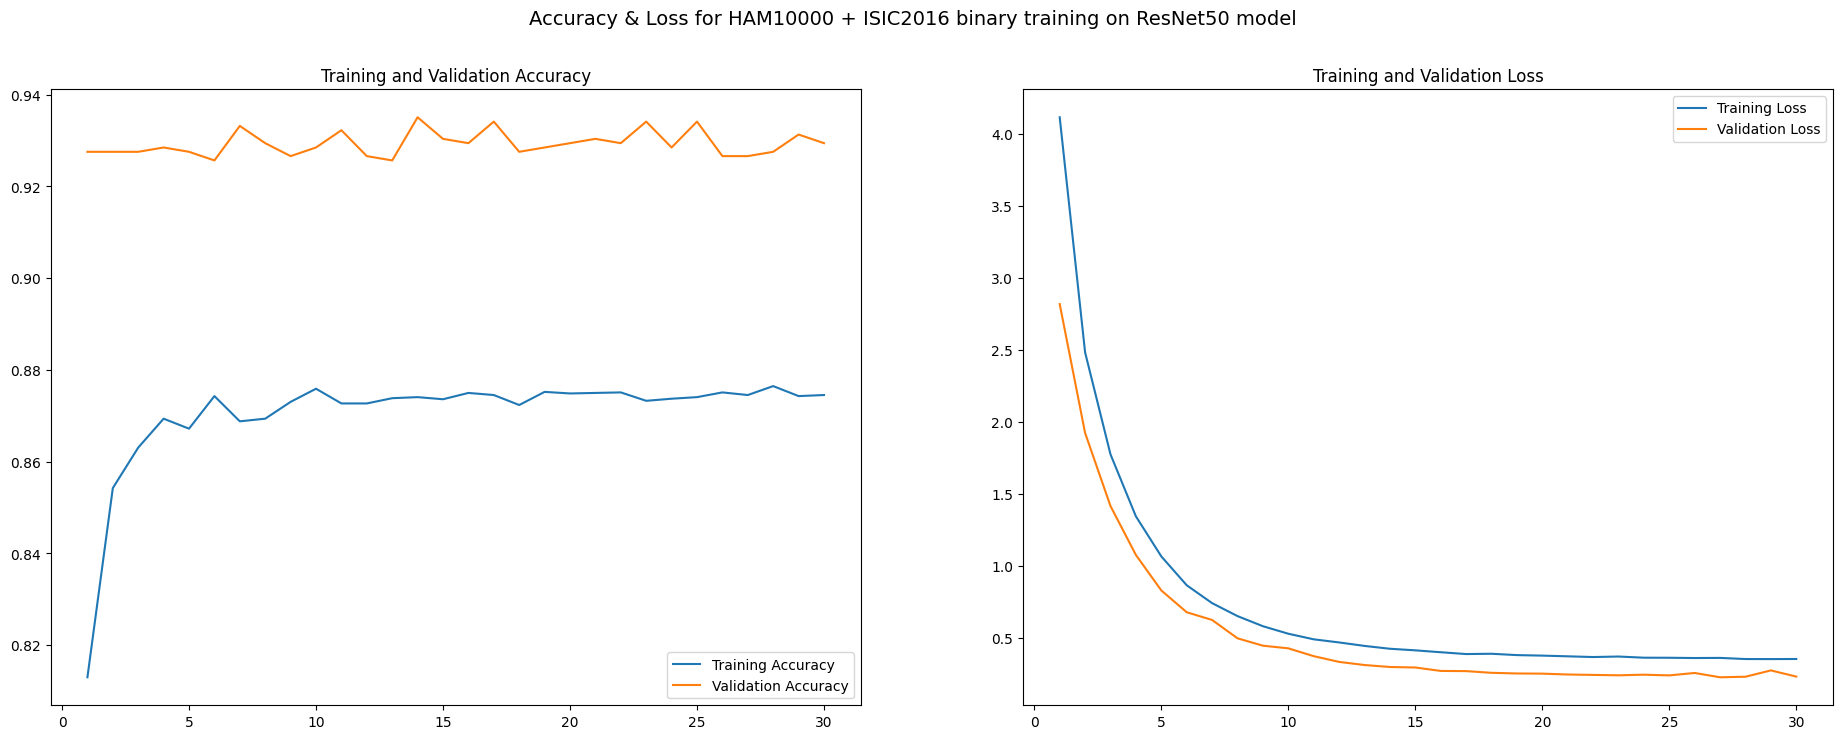

In [16]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (112, 150) # height, width
utilInstance = mel.Util(rootpath, img_size)
dataType = mel.DatasetType.ISIC2017


DEBUG = 0
# Save datasets as pickle files
if (DEBUG == 1):
    utilInstance.saveDatasetsToFile(dataType)

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')
trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')
trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

# Now, let's combine HAM10000 and ISIC2016 DBs
trainimages_combination = {"HAM10000 train images":trainimages_HAM10000, "ISIC2016 train images":trainimages_ISIC2016}
testimages_combination = {"HAM10000 test images":testimages_HAM10000, "ISIC2016 test images":testimages_ISIC2016}
validationimages_combination = {"HAM10000 validation images":validationimages_HAM10000, "ISIC2016 validation images":validationimages_ISIC2016}
trainlabels_combination = {"HAM10000 train labels":trainlabels_binary_HAM10000, "ISIC2016 train labels":trainlabels_binary_ISIC2016}
testlabels_combination = {"HAM10000 test labels":testlabels_binary_HAM10000, "ISIC2016 test labels":testlabels_binary_ISIC2016}
validationlabels_combination = {"HAM10000 validation labels":validationlabels_binary_HAM10000, "ISIC2016 validation labels":validationlabels_binary_ISIC2016}

trainimages_HAM10000_ISIC2016 = utilInstance.combine_images(**trainimages_combination)
testimages_HAM10000_ISIC2016 = utilInstance.combine_images(**testimages_combination)
validationimages_HAM10000_ISIC2016 = utilInstance.combine_images(**validationimages_combination)
trainlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**trainlabels_combination)
testlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**testlabels_combination)
validationlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**validationlabels_combination)

img_height, img_width = utilInstance.getImgSize()
CFG = dict(
			batch_size            =  20,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  30,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  90.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.1, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.1, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

# HAM10000 + ISIC2016 binary training

base_model_binary = mel.CNN(trainimages_HAM10000_ISIC2016, trainlabels_binary_HAM10000_ISIC2016, \
    validationimages_HAM10000_ISIC2016, validationlabels_binary_HAM10000_ISIC2016, \
        testimages_HAM10000_ISIC2016, testlabels_binary_HAM10000_ISIC2016, CFG)
ResNet50_name = 'HAM10000 + ISIC2016 binary training on ResNet50'
data_gen_HAM10000_ISIC2016, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

history_HAM10000_ISIC2016_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000_ISIC2016,
    trainlabels = trainlabels_binary_HAM10000_ISIC2016,
    validationimages = validationimages_HAM10000_ISIC2016,
    validationlabels = validationlabels_binary_HAM10000_ISIC2016,
    data_gen = data_gen_HAM10000_ISIC2016
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_HAM10000_ISIC2016_bin
)